# 1. Dataset Selection and Exploration 

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("restaurant_menu_optimization_data.csv")

# Strip spasi dari nama kolom (penting!)
df.columns = df.columns.str.strip()

# Tampilkan 5 baris pertama
df.head()


,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
0,R003,Beverages,Soda,['confidential'],2.55,Low
1,R001,Appetizers,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.12,Medium
2,R003,Desserts,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.66,High
3,R003,Main Course,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",29.55,High
4,R002,Main Course,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",17.73,Medium


In [145]:
# Informasi kolom dan tipe data
df.info()

print()  # Spasi antar output

# Cek jumlah nilai unik
print("Nilai unik tiap kolom:\n", df.nunique())

print()  # Spasi antar output

# Cek missing values
print("Missing values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RestaurantID   1000 non-null   object 
 1   MenuCategory   1000 non-null   object 
 2   MenuItem       1000 non-null   object 
 3   Ingredients    1000 non-null   object 
 4   Price          1000 non-null   float64
 5   Profitability  1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB

Nilai unik tiap kolom:
 RestaurantID       3
MenuCategory       4
MenuItem          16
Ingredients        4
Price            767
Profitability      3
dtype: int64

Missing values:
 RestaurantID     0
MenuCategory     0
MenuItem         0
Ingredients      0
Price            0
Profitability    0
dtype: int64


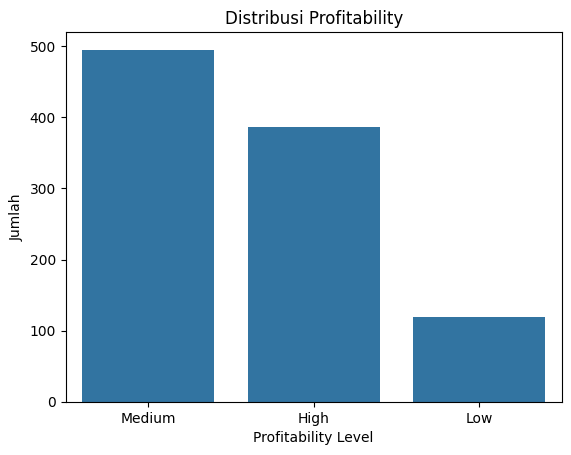

Profitability
Medium    0.495
High      0.386
Low       0.119
Name: proportion, dtype: float64

In [146]:
sns.countplot(x='Profitability', data=df, order=df['Profitability'].value_counts().index)
plt.title("Distribusi Profitability")
plt.xlabel("Profitability Level")
plt.ylabel("Jumlah")
plt.show()

# Rasio per kelas
df['Profitability'].value_counts(normalize=True)


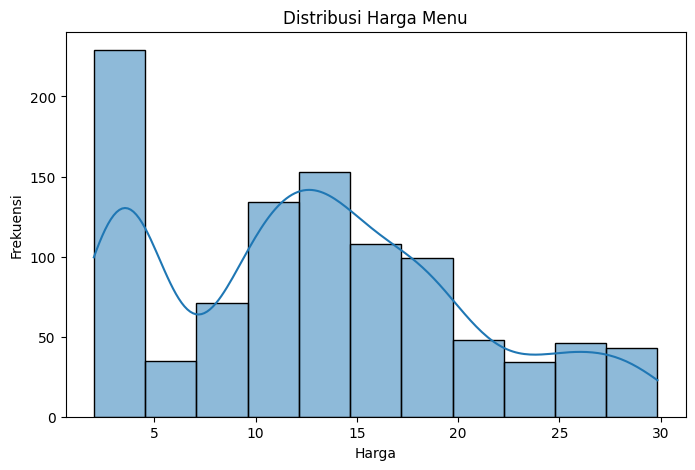

In [147]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], kde=True)
plt.title("Distribusi Harga Menu")
plt.xlabel("Harga")
plt.ylabel("Frekuensi")
plt.show()


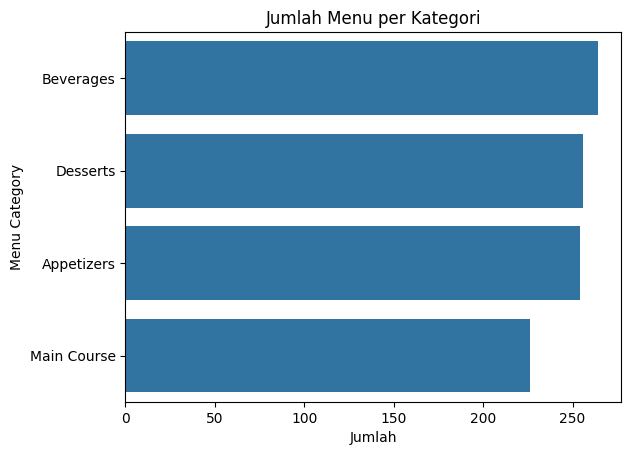

In [148]:
sns.countplot(y='MenuCategory', data=df, order=df['MenuCategory'].value_counts().index)
plt.title("Jumlah Menu per Kategori")
plt.xlabel("Jumlah")
plt.ylabel("Menu Category")
plt.show()

print()  # Spasi 1 baris agar output lebih rapi


# 2. Data Preprocessing 

In [149]:
# Pilih hanya kolom yang akan digunakan
df = df[['RestaurantID', 'MenuCategory', 'Price', 'Profitability']]

# Cek dan bersihkan data kosong
print("Missing values:\n", df.isnull().sum())
df.dropna(inplace=True)  # Hapus baris dengan missing value



Missing values:
 RestaurantID     0
MenuCategory     0
Price            0
Profitability    0
dtype: int64


In [150]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder untuk fitur kategori
le_restaurant = LabelEncoder()
le_category = LabelEncoder()
le_profit = LabelEncoder()

df['restaurantid_encoded'] = le_restaurant.fit_transform(df['RestaurantID'])
df['menucategory_encoded'] = le_category.fit_transform(df['MenuCategory'])
df['Profitability_encoded'] = le_profit.fit_transform(df['Profitability'])

# Cek mapping label target
for cls, code in zip(le_profit.classes_, le_profit.transform(le_profit.classes_)):
    print(f"{cls} → {code}")


High → 0
Low → 1
Medium → 2


In [151]:
# Fitur (X)
X = df[['restaurantid_encoded', 'menucategory_encoded', 'Price']]

# Target (y)
y = df['Profitability_encoded']



In [152]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [153]:
# Cek data hasil preprocessing
print("Contoh data X_train:")
print(X_train.head())

print("\nDistribusi y_train:")
print(y_train.value_counts(normalize=True))


Contoh data X_train:
     restaurantid_encoded  menucategory_encoded  Price
441                     2                     1   2.85
955                     2                     0   8.54
98                      2                     0  13.67
36                      0                     2  11.11
887                     0                     3  18.24

Distribusi y_train:
Profitability_encoded
2    0.49500
0    0.38625
1    0.11875
Name: proportion, dtype: float64


# 3. Model Training and Comparison

## 6 Model 

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inisialisasi model
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'ANN (MLPClassifier)': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}



In [155]:
# Evaluasi setiap model
results_df.sort_values(by='Accuracy', ascending=False, inplace=True)
display(results_df)


,Model,Accuracy,Precision,Recall,F1-Score
1,KNN,0.920,0.923400,0.850469,0.875559
2,ANN,0.915,0.920503,0.845178,0.872047
0,Decision Tree,0.870,0.851912,0.816739,0.831839


## 3 Model

In [156]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Inisialisasi model default
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "ANN": MLPClassifier(random_state=42, max_iter=500)
}

# Simpan hasil evaluasi
eval_results = []

# Loop model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f"=== {name} ===")
    print(classification_report(y_test, y_pred))
    
    eval_results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })


=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        77
           1       0.80      0.67      0.73        24
           2       0.88      0.94      0.91        99

    accuracy                           0.87       200
   macro avg       0.85      0.82      0.83       200
weighted avg       0.87      0.87      0.87       200

=== KNN ===
              precision    recall  f1-score   support

           0       0.88      0.99      0.93        77
           1       0.94      0.62      0.75        24
           2       0.95      0.94      0.94        99

    accuracy                           0.92       200
   macro avg       0.92      0.85      0.88       200
weighted avg       0.92      0.92      0.92       200

=== ANN ===
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        77
           1       0.94      0.62      0.75        24
           2       0.92      

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


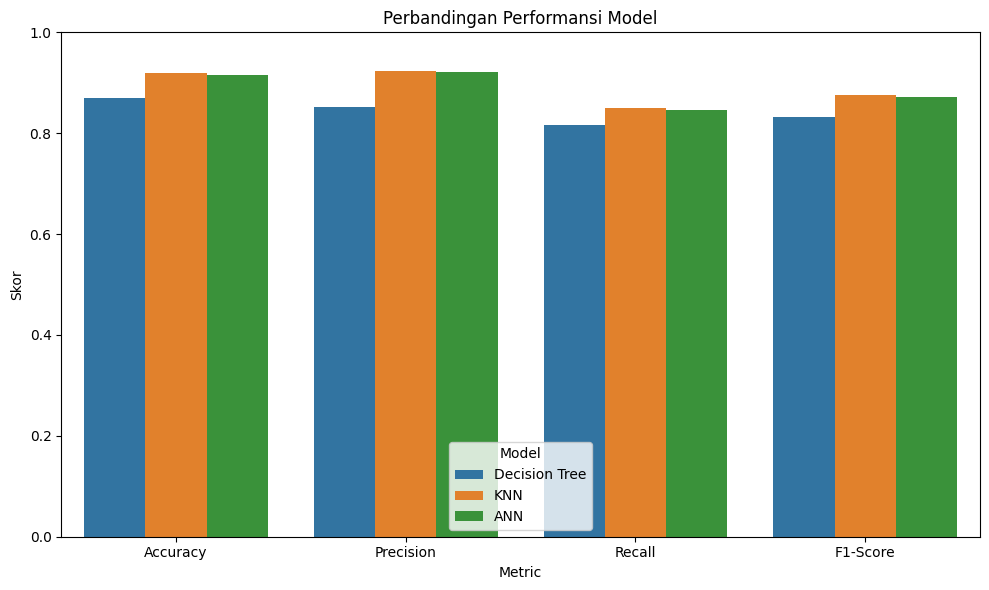

In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Buat DataFrame dari hasil evaluasi
results_df = pd.DataFrame(eval_results)

# Visualisasi
plt.figure(figsize=(10,6))
sns.barplot(data=results_df.melt(id_vars="Model"), x="variable", y="value", hue="Model")
plt.title("Perbandingan Performansi Model")
plt.ylabel("Skor")
plt.xlabel("Metric")
plt.ylim(0, 1)
plt.legend(title="Model")
plt.tight_layout()
plt.show()


### Tuning Decision Tree

In [158]:
from sklearn.model_selection import GridSearchCV

dt_params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 3, 1199]
}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)

print("Best Decision Tree Params:", dt_grid.best_params_)


Best Decision Tree Params: {'max_depth': 5, 'min_samples_split': 2}


### Tuning KNN

In [159]:
knn_params = {
    'n_neighbors': [30, 50, 70, 90],
    'weights': ['uniform', 'distance']
}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)

print("Best KNN Params:", knn_grid.best_params_)


Best KNN Params: {'n_neighbors': 30, 'weights': 'distance'}


### Tuning ANN

In [160]:
ann_params = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd']
}

ann_grid = GridSearchCV(MLPClassifier(max_iter=500, random_state=42), ann_params, cv=5, scoring='accuracy')
ann_grid.fit(X_train, y_train)

print("Best ANN Params:", ann_grid.best_params_)


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the 

Best ANN Params: {'activation': 'relu', 'hidden_layer_sizes': (50,), 'solver': 'adam'}


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [161]:
from sklearn.model_selection import cross_val_score

# Gunakan best estimator dari hasil GridSearch
for name, model in zip(
    ["Decision Tree", "KNN", "ANN"],
    [dt_grid.best_estimator_, knn_grid.best_estimator_, ann_grid.best_estimator_]
):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name} Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


Decision Tree Cross-Validation Accuracy: 0.9120 ± 0.0246
KNN Cross-Validation Accuracy: 0.9020 ± 0.0163


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the 

ANN Cross-Validation Accuracy: 0.9060 ± 0.0222


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [162]:
# Contoh hasil evaluasi otomatis dari loop
eval_results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    eval_results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })

# Langsung ubah jadi DataFrame
results_df = pd.DataFrame(eval_results)

# Tampilkan tabel rapi
display(results_df.sort_values(by="Accuracy", ascending=False))


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model,Accuracy,Precision,Recall,F1-Score
1,KNN,0.920,0.923400,0.850469,0.875559
2,ANN,0.915,0.920503,0.845178,0.872047
0,Decision Tree,0.870,0.851912,0.816739,0.831839


In [163]:
dt_best = dt_grid.best_params_
knn_best = knn_grid.best_params_
ann_best = ann_grid.best_params_

param_df = pd.DataFrame([
    {"Model": "Decision Tree", "Best Params": dt_best},
    {"Model": "KNN", "Best Params": knn_best},
    {"Model": "ANN", "Best Params": ann_best}
])

display(param_df)


,Model,Best Params
0,Decision Tree,"{'max_depth': 5, 'min_samples_split': 2}"
1,KNN,"{'n_neighbors': 30, 'weights': 'distance'}"
2,ANN,"{'activation': 'relu', 'hidden_layer_sizes': (..."


In [164]:
from sklearn.model_selection import cross_val_score

cv_scores = []
for name, model in [
    ("Decision Tree", dt_grid.best_estimator_),
    ("KNN", knn_grid.best_estimator_),
    ("ANN", ann_grid.best_estimator_)
]:
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_scores.append({
        "Model": name,
        "CV Mean Accuracy": scores.mean(),
        "CV Std Dev": scores.std()
    })

cv_df = pd.DataFrame(cv_scores)
display(cv_df)


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the 

,Model,CV Mean Accuracy,CV Std Dev
0,Decision Tree,0.912,0.024617
1,KNN,0.902,0.016310
2,ANN,0.906,0.022226


# 4. Model Selection and Deployment

In [169]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
import pickle

# ===== 1. Load data =====
df = pd.read_csv("restaurant_menu_optimization_data.csv")
df.columns = df.columns.str.strip()

# Pilih variabel yang digunakan
df = df[['RestaurantID', 'MenuCategory', 'Price', 'Profitability']].dropna()

# ===== 2. Split data =====
X = df[['RestaurantID', 'MenuCategory', 'Price']]
y = df['Profitability']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ===== 3. Buat pipeline =====
# Encoder untuk kolom kategori
categorical_features = ['RestaurantID', 'MenuCategory']
numeric_features = ['Price']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numeric_features)
    ]
)

# Model KNN dengan parameter terbaikmu
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Gabungkan preprocessor + model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', knn)
])

# ===== 4. Latih model =====
pipeline.fit(X_train, y_train)

# ===== 5. Simpan pipeline =====
with open("knn_pipeline.pkl", "wb") as f:
    pickle.dump(pipeline, f)

print("✅ Pipeline KNN disimpan sebagai 'knn_pipeline.pkl'")


✅ Pipeline KNN disimpan sebagai 'knn_pipeline.pkl'


In [166]:
import pandas as pd
import pickle

def predict_profitability(restaurant_id, menu_category, price):
    # Strip whitespace from inputs
    restaurant_id = restaurant_id.strip()
    menu_category = menu_category.strip()
    
    # Encode input using label encoders
    restaurantid_encoded = le_restaurant.transform([restaurant_id])[0]
    menucategory_encoded = le_category.transform([menu_category])[0]

    # Buat DataFrame sesuai fitur model
    new_data = pd.DataFrame({
        'restaurantid_encoded': [restaurantid_encoded],
        'menucategory_encoded': [menucategory_encoded],
        'Price': [price]
    })

    # Load model KNN final
    with open("knn_final_model.pkl", "rb") as f:
        model = pickle.load(f)

    # Prediksi
    prediction = model.predict(new_data)[0]
    return prediction

# 🔹 Contoh prediksi
hasil_prediksi = predict_profitability('R001', "Desserts ", 89.9)
print(f"Prediksi Profitability: {hasil_prediksi}")


Prediksi Profitability: 0


In [167]:
import pickle

# Simpan label encoder dictionary
label_encoders = {
    "restaurant": le_restaurant,
    "category": le_category,
    "profit": le_profit
}

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoders, f)


In [168]:
import streamlit as st
import pandas as pd
import pickle

# ======== Load Model & Label Encoders ========
with open("knn_final_model.pkl", "rb") as f:
    model = pickle.load(f)

with open("label_encoder.pkl", "rb") as f:
    label_encoders = pickle.load(f)

# ======== Judul Aplikasi ========
st.title("🍽️ Prediksi Profitability Restoran")
st.write("Masukkan detail restoran dan menu untuk memprediksi keuntungan (Low / Medium / High)")

# ======== Form Input ========
restaurant_id = st.text_input("Restaurant ID")
menu_category = st.text_input("Menu Category")
price = st.number_input("Price", min_value=0.0)

# ======== Prediksi ========
if st.button("Prediksi"):
    if restaurant_id and menu_category and price:
        # Encode input using label encoders
        try:
            restaurantid_encoded = label_encoders["restaurant"].transform([restaurant_id.strip()])[0]
            menucategory_encoded = label_encoders["category"].transform([menu_category.strip()])[0]
        except Exception as e:
            st.error("ID atau kategori tidak ditemukan di data pelatihan.")
            st.stop()

        # Buat DataFrame sesuai fitur model
        new_data = pd.DataFrame({
            'restaurantid_encoded': [restaurantid_encoded],
            'menucategory_encoded': [menucategory_encoded],
            'Price': [price]
        })

        # Prediksi
        pred_encoded = model.predict(new_data)[0]
        prediction_label = label_encoders["profit"].inverse_transform([pred_encoded])[0]

        st.success(f"📊 Prediksi Profitability: **{prediction_label}**")
    else:
        st.warning("⚠️ Mohon isi semua kolom input.")


2025-08-08 15:30:05.962 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-08 15:30:05.962 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-08 15:30:05.962 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-08 15:30:05.962 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-08 15:30:05.962 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-08 15:30:05.970 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-08 15:30:05.970 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-08 15:30:05.970 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [173]:
import joblib
import pickle

# Kalau masih punya model final di lokal
from sklearn.neighbors import KNeighborsClassifier

# Load model lama (.pkl) yang ada
with open("knn_final_model.pkl", "rb") as f:
    model = pickle.load(f)

# Simpan ulang dalam format joblib (lebih aman untuk sklearn)
joblib.dump(model, "knn_final_model.joblib")
print("✅ Model disimpan ulang sebagai knn_final_model.joblib")

# Simpan label encoder
joblib.dump(label_encoders, "label_encoder.joblib")

# Kalau ada preprocessor, simpan juga
joblib.dump(preprocessor, "preprocessor.joblib")



✅ Model disimpan ulang sebagai knn_final_model.joblib


['preprocessor.joblib']